In [124]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [87]:
train_data = pd.read_csv('train_data_csv_nlp_ab.csv')
test_data = pd.read_csv('test_data_csv_nlp_ab.csv')
X_train = train_data.Column1
X_test = test_data.Column1
y_train = train_data.Column2
y_test = test_data.Column2
train_data.head(10)

,Column1,Column2
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,2
5,ive been feeling a little burdened lately wasn...,1
6,ive been taking or milligrams or times recomme...,4
7,i feel as confused about life as a teenager or...,5
8,i have been with petronas for years i feel tha...,6
9,i feel romantic too,3


In [34]:
test_data.head(10)

,Column1,Column2
0,im feeling rather rotten so im not very ambiti...,1
1,im updating my blog because i feel shitty,1
2,i never make her separate from me because i do...,1
3,i left with my bouquet of red and yellow tulip...,6
4,i was feeling a little vain when i did this one,1
5,i cant walk into a shop anywhere where i do no...,5
6,i felt 2 when at the end of a telephone call,2
7,i explain why i clung to a relationship with a...,6
8,i like to have the same breathless feeling as ...,6
9,i jest i feel grumpy tired and pre menstrual w...,2


In [35]:
train_data.describe

<bound method NDFrame.describe of                                                  Column1  Column2
0                                i didnt feel humiliated        1
1      i can go from feeling so hopeless to so damned...        1
2       im grabbing a minute to post i feel greedy wrong        2
3      i am ever feeling nostalgic about the fireplac...        3
4                                   i am feeling grouchy        2
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...        1
15996  i am now turning and i feel pathetic that i am...        1
15997                     i feel strong and good overall        6
15998  i feel like this was such a rude comment and i...        2
15999  i know a lot but i feel so stupid because i ca...        1

[16000 rows x 2 columns]>

In [36]:
test_data.describe

<bound method NDFrame.describe of                                                 Column1  Column2
0     im feeling rather rotten so im not very ambiti...        1
1             im updating my blog because i feel shitty        1
2     i never make her separate from me because i do...        1
3     i left with my bouquet of red and yellow tulip...        6
4       i was feeling a little vain when i did this one        1
...                                                 ...      ...
1995  i just keep feeling like someone is being unki...        2
1996  im feeling a little cranky negative after this...        2
1997  i feel that i am useful to my people and that ...        6
1998  im feeling more comfortable with derby i feel ...        6
1999  i feel all weird when i have to meet w people ...        5

[2000 rows x 2 columns]>

In [96]:
# Statements representing sadness
train_data[train_data['Column2'] == 1].head(10)

,Column1,Column2
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
5,ive been feeling a little burdened lately wasn...,1
10,i feel like i have to make the suffering i m s...,1
13,i feel low energy i m just thirsty,1
16,i didnt really feel that embarrassed,1
17,i feel pretty pathetic most of the time,1
18,i started feeling sentimental about dolls i ha...,1
25,i still 3 my so and wish the best for him i ca...,1
26,i feel so inhibited in someone elses kitchen l...,1


In [38]:
# Statements representing anger
train_data[train_data['Column2'] == 2].head(10)

,Column1,Column2
2,im grabbing a minute to post i feel greedy wrong,2
4,i am feeling grouchy,2
12,i think it s the easiest time of year to feel ...,2
20,i feel irritated and rejected without anyone d...,2
24,i already feel like i fucked up though because...,2
28,i feel kinda appalled that she feels like she ...,2
33,i climbed the hill feeling frustrated that id ...,2
38,i feel a bit rude writing to an elderly gentle...,2
49,i stopped feeling cold and began feeling hot,2
52,i feel selfish and spoiled,2


In [39]:
# Statements representing love
train_data[train_data['Column2'] == 3].head(10)

,Column1,Column2
3,i am ever feeling nostalgic about the fireplac...,3
9,i feel romantic too,3
47,i can t let go of that sad feeling that i want...,3
61,i ate i could feel a gentle tingle throughout ...,3
68,i suppose my own truth needs to be shared i ha...,3
90,i was ready to meet mom in the airport and fee...,3
94,i talk to dogs as i feel they cannot understan...,3
100,i wont let me child cry it out because i feel ...,3
112,i feel like some of you have pains and you can...,3
124,i am very excited to finally meet that compani...,3


In [40]:
# Statements representing surprise
train_data[train_data['Column2'] == 4].head(10)

,Column1,Column2
6,ive been taking or milligrams or times recomme...,4
32,i have seen heard and read over the past coupl...,4
57,i keep feeling pleasantly 4d at his supportive...,4
64,i am now nearly finished the week detox and i ...,4
129,i too feel as if i am a str2 in a strange land...,4
145,i started feeling funny and then friday i woke...,4
156,im certainly not going to sit and tell you wha...,4
157,im sorry that there wasnt more humor in this p...,4
168,i want to hold this feeling of shocked awe and...,4
181,i will enclose her verses on her could not wei...,4


In [41]:
# Statements representing fear
train_data[train_data['Column2'] == 5].head(10)

,Column1,Column2
7,i feel as confused about life as a teenager or...,5
19,i now feel compromised and skeptical of the va...,5
21,i am feeling completely overwhelmed i have two...,5
31,i remember feeling acutely distressed for a fe...,5
53,i was stymied a little bit as i wrote feeling ...,5
62,i feel like we are pressured into being young ...,5
63,i began having them several times a week feeli...,5
89,i will be able to lay on my bed in the dark an...,5
120,i had begun to feel apprehensive when thick bl...,5
121,i had stated to her the reason i feel so 5ful ...,5


In [42]:
# Statements representing joy
train_data[train_data['Column2'] == 6].head(10)

,Column1,Column2
8,i have been with petronas for years i feel tha...,6
11,i do feel that running is a divine experience ...,6
14,i have immense sympathy with the general point...,6
15,i do not feel reassured anxiety is on each side,6
22,i have the feeling she was amused and delighted,6
23,i was able to help chai lifeline with your sup...,6
29,i feel more superior dead chicken or grieving ...,6
30,i get giddy over feeling elegant in a perfectl...,6
34,i can t imagine a real life scenario where i w...,6
35,i am not sure what would make me feel content ...,6


In [43]:
#1 - sadness
#2 - anger
#3 - love
#4 - surprise
#5 - fear
#6 - joy
train_data["Column2"].value_counts()

6    5362
1    4666
2    2159
5    1937
3    1304
4     572
Name: Column2, dtype: int64

In the train dataset, we have 5362-joy-(~33.5%)texts, 

4666-sadness (~29.1%)texts, 

2159-anger (~13.49%)texts, 

1937-fear (~12.1%)texts, 

1304-love (~8.15%)texts, 

572-surprise (~3.575%)text.

So, it is an imbalanced classification challenge.

# Preprocessing the data

In [44]:
#removing the words having lenght shorter than 3
train_data['Column1'] = train_data['Column1'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train_data.head()

,Column1,Column2
0,didnt feel humiliated,1
1,from feeling hopeless damned hopeful just from...,1
2,grabbing minute post feel greedy wrong,2
3,ever feeling nostalgic about fireplace will kn...,3
4,feeling grouchy,2


In [45]:
tokenized_data = train_data['Column1'].apply(lambda x: x.split())
tokenized_data

0                                [didnt, feel, humiliated]
1        [from, feeling, hopeless, damned, hopeful, jus...
2            [grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, about, fireplace, w...
4                                       [feeling, grouchy]
                               ...                        
15995    [just, very, brief, time, beanbag, said, anna,...
15996    [turning, feel, pathetic, that, still, waiting...
15997                        [feel, strong, good, overall]
15998    [feel, like, this, such, rude, comment, glad, ...
15999               [know, feel, stupid, because, portray]
Name: Column1, Length: 16000, dtype: object

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mrinal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [46]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_data = tokenized_data.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_data 

0                                    [didnt, feel, humili]
1        [from, feel, hopeless, damn, hope, just, from,...
2                 [grab, minut, post, feel, greedi, wrong]
3        [ever, feel, nostalg, about, fireplac, will, k...
4                                          [feel, grouchi]
                               ...                        
15995    [just, veri, brief, time, beanbag, said, anna,...
15996    [turn, feel, pathet, that, still, wait, tabl, ...
15997                         [feel, strong, good, overal]
15998    [feel, like, thi, such, rude, comment, glad, t...
15999                [know, feel, stupid, becaus, portray]
Name: Column1, Length: 16000, dtype: object

In [47]:
for i in range(len(tokenized_data)):
    tokenized_data[i] = ' '.join(tokenized_data[i])
    
train_data['Column1'] = tokenized_data

Story Generation and Visualization from Texts

A) Understanding the common words used in the texts: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mrinal\anaconda3\python.exe -m pip install --upgrade pip' command.


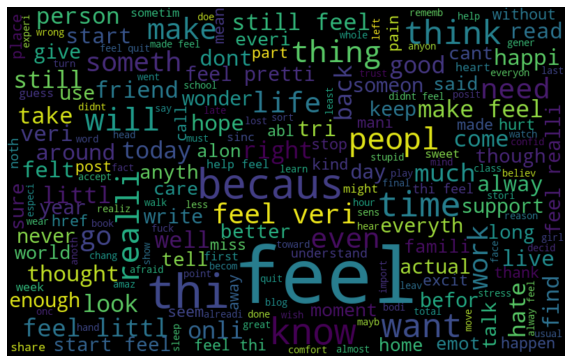

In [50]:
#wordcloud containing all words
all_words = ' '.join([text for text in train_data['Column1']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


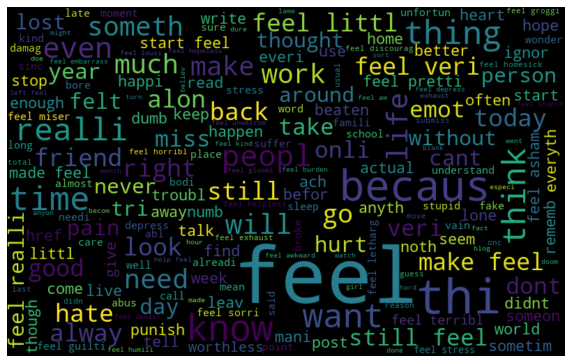

In [58]:
#wordcloud containing sad words
sad_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(sad_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

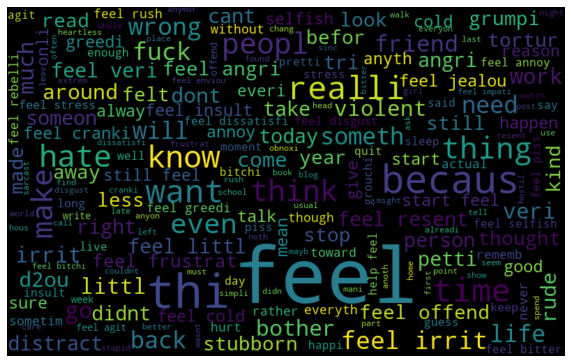

In [59]:
#wordcloud containing angry words
anger_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(anger_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

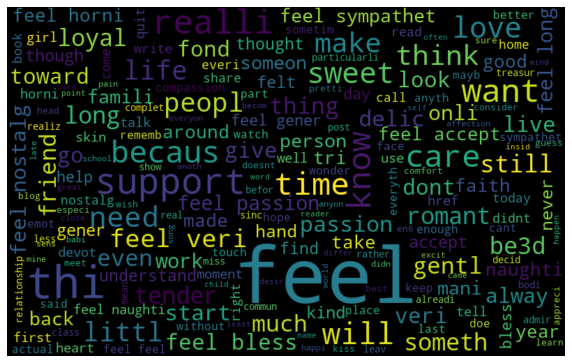

In [60]:
#wordcloud containing love words
love_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(love_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

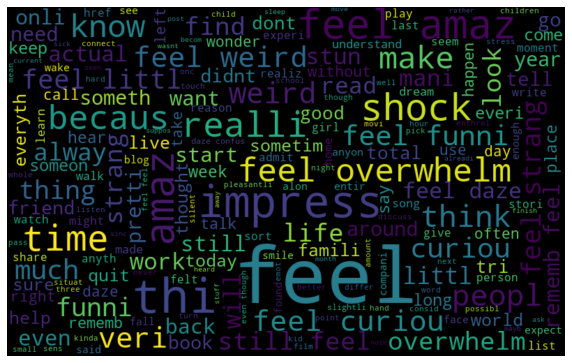

In [61]:
#wordcloud containing surprising words
surprise_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(surprise_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

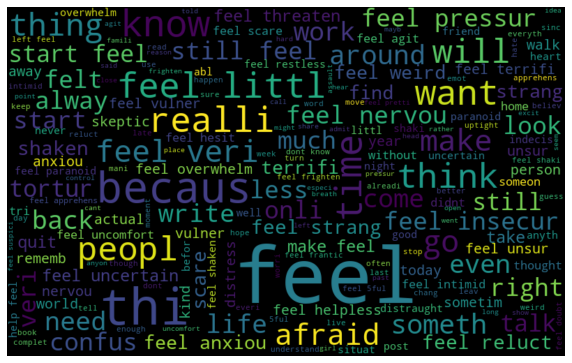

In [62]:
#wordcloud containing fear words
fear_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 5]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fear_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

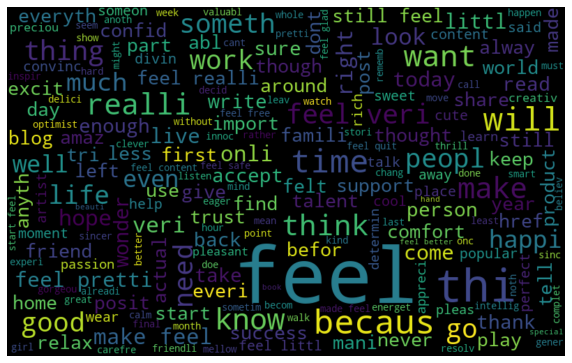

In [63]:
#wordcloud containing joy words
joy_words =' '.join([text for text in train_data['Column1'][train_data['Column2'] == 6]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(joy_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [65]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108253 sha256=8254e8f56f9fbc92e83d76435f25105ec3078bc07d1c6b2e7d40a43fb57e7e3c
  Stored in directory: c:\users\mrinal\appdata\local\pip\cache\wheels\34\3d\14\f19c01a19c9201cdb6a76b049904d5226912569be919ad1eae
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mrinal\anaconda3\python.exe -m pip install --upgrade pip' command.


# Converting the text into vectors

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [104]:
# bag of words vectorization
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_x_train_vec = bow_vectorizer.fit_transform(train_data['Column1'])
bow_x_test_vec = bow_vectorizer.fit_transform(test_data['Column1'])
bow_x_train_vec
bow_x_test_vec

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 11741 stored elements in Compressed Sparse Row format>

In [106]:
# tfidf vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_x_train_vec = tfidf_vectorizer.fit_transform(train_data['Column1'])
tfidf_x_test_vec = tfidf_vectorizer.fit_transform(test_data['Column1'])
tfidf_x_train_vec
tfidf_x_test_vec

<2000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 11741 stored elements in Compressed Sparse Row format>

In [108]:
#word2vec vectorization
tokenized_data_train = train_data['Column1'].apply(lambda x: x.split()) # tokenizing

model_w2v_train = gensim.models.Word2Vec(
            tokenized_data_train,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v_train.train(tokenized_data_train, total_examples= len(train_data['Column1']), epochs=20)

(4046039, 6133220)

In [109]:
# this function takes the averge of each word in a sentence and creates a sentence vector
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [115]:
wordvec_arrays_train = np.zeros((len(tokenized_data_train), 200))

for i in range(len(tokenized_data_train)):
    wordvec_arrays_train[i,:] = word_vector(tokenized_data_train[i], 200)
    
wordvec_df_x_train_vec = pd.DataFrame(wordvec_arrays_train)
wordvec_df_x_train_vec

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.352147,-0.165688,0.341473,0.176516,-0.048222,0.055201,0.314567,-0.081946,0.219460,-0.331701,...,-0.142972,0.011651,0.421547,0.060585,0.013185,0.156848,0.010782,-0.028363,-0.107193,-0.109344
1,-0.323687,-0.077135,0.073850,0.109993,-0.024469,0.281749,0.327088,-0.263639,0.282564,-0.239606,...,-0.173556,-0.146700,0.377713,0.051921,-0.049308,0.055309,-0.053965,-0.159060,-0.091089,-0.118101
2,-0.370444,0.009578,0.126468,0.086891,-0.013458,0.196666,0.243275,-0.207165,0.263488,-0.221578,...,-0.055554,0.021563,0.312307,0.139403,-0.088094,0.107624,-0.005728,-0.055608,-0.125889,-0.069324
3,-0.284492,-0.037346,0.187435,0.062016,0.004538,0.158999,0.297612,-0.128805,0.221520,-0.198944,...,-0.189330,-0.039868,0.310722,0.114945,-0.038172,0.095052,-0.058255,-0.086177,-0.104044,-0.128373
4,-0.350667,-0.050128,0.267402,0.064941,0.019652,0.073932,0.295501,-0.091264,0.319452,-0.308726,...,-0.308567,-0.128741,0.377217,0.052004,-0.171466,0.348224,-0.242463,0.074866,-0.041488,0.011865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.202415,-0.032276,0.229813,0.142433,-0.090617,0.082738,0.225012,-0.205598,0.237494,-0.198397,...,-0.089650,-0.111102,0.423996,0.161926,0.013895,0.076339,-0.047112,-0.172610,-0.127947,-0.175506
15996,-0.274481,-0.040339,0.094161,0.051524,0.009460,0.112302,0.284052,-0.170541,0.161496,-0.231493,...,-0.156231,-0.029123,0.390047,0.189447,-0.108652,0.229775,-0.084833,-0.135884,-0.127832,-0.094738
15997,-0.285766,-0.168856,0.298122,0.249196,-0.080591,0.222153,0.360013,-0.168766,0.065889,-0.123546,...,-0.255265,-0.064980,0.376868,-0.002500,-0.018117,0.055727,-0.013255,-0.199857,-0.060632,-0.091538
15998,-0.309077,-0.046304,0.110070,0.047700,-0.009212,0.046414,0.320081,-0.184469,0.204299,-0.177631,...,-0.076269,-0.088943,0.411990,0.101224,-0.114896,0.093165,0.030638,-0.109482,-0.136820,-0.010879


In [111]:
# word2vec vectorization
#tokenized_data_train = X_train.apply(lambda x: x.split()) # tokenizing
tokenized_data_test = X_test.apply(lambda x: x.split()) # tokenizing

model_w2v_test = gensim.models.Word2Vec(
            tokenized_data_test,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v_test.train(tokenized_data_test, total_examples= len(X_train), epochs=20)

(464217, 766160)

In [112]:
# this function takes the averge of each word in a sentence and creates a sentence vector
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [114]:
wordvec_arrays_test = np.zeros((len(tokenized_data_test), 200))

for i in range(len(tokenized_data_test)):
    wordvec_arrays_test[i,:] = word_vector(tokenized_data_test[i], 200)
    
wordvec_df_x_test_vec = pd.DataFrame(wordvec_arrays_test)
wordvec_df_x_test_vec

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.298646,-0.142026,0.090927,0.112965,0.207414,-0.030281,0.291801,-0.215831,0.262177,-0.354735,...,-0.155362,-0.000078,0.441927,-0.051832,-0.070003,0.226481,-0.010624,0.089700,-0.238447,-0.137265
1,-0.365984,-0.122142,0.158496,0.156791,0.030079,0.201796,0.303616,-0.223671,0.192235,-0.109326,...,-0.136358,-0.064898,0.374533,0.037000,-0.133272,0.232920,0.011315,-0.219238,-0.118787,0.063331
2,-0.396688,0.040493,0.022340,0.057218,-0.123060,0.152066,0.341101,-0.298272,0.350748,-0.197553,...,-0.060486,-0.202931,0.357091,0.183631,-0.081947,0.081864,0.079680,-0.235056,-0.087148,-0.178676
3,-0.289331,-0.049440,0.115464,0.046539,0.016859,0.216184,0.218901,-0.086419,0.208850,-0.132191,...,-0.258646,0.021017,0.479658,0.076262,0.070841,0.125592,-0.038910,-0.202565,-0.041639,-0.218873
4,-0.279282,0.018707,0.196287,-0.034154,0.108003,0.035621,0.281070,-0.194247,0.190726,-0.152868,...,-0.163180,-0.135770,0.438675,0.179542,-0.052023,0.284915,-0.072663,0.043557,-0.052537,-0.015350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.230476,0.013020,0.082948,0.139846,-0.002365,0.219980,0.217562,-0.242254,0.299740,-0.167000,...,-0.131066,-0.060978,0.386919,0.135206,-0.044041,-0.003543,-0.022634,-0.178183,-0.061375,-0.218753
1996,-0.208080,-0.052949,0.149335,0.096720,0.090037,0.093274,0.303359,-0.141590,0.132902,-0.221996,...,-0.118678,-0.128445,0.446082,0.099084,0.013420,0.199109,-0.105902,-0.178902,-0.056295,-0.091632
1997,-0.277067,0.018346,0.160603,0.061339,0.022236,0.243474,0.288424,-0.125885,0.194600,-0.149187,...,-0.135269,-0.021435,0.400610,0.059908,-0.083286,0.068655,0.013834,-0.155569,-0.037367,-0.123280
1998,-0.250219,-0.041596,0.101122,0.135786,0.006064,0.217148,0.262351,-0.177743,0.243725,-0.082041,...,-0.145174,0.022120,0.403626,0.066503,-0.029663,0.106230,-0.014561,-0.122172,-0.047424,-0.145648


In [75]:
# doc2vec vectorization
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\Mrinal\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [76]:
def add_label(dt):
    output = []
    for i, s in zip(dt.index, dt):
        output.append(LabeledSentence(s, ["data_" + str(i)]))
    return output

In [117]:
labeled_data_train = add_label(tokenized_data_train)

In [118]:
model_d2v_train = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v_train.build_vocab([i for i in tqdm(labeled_data_train)])

100%|███████████████████████████████████████████████████████████████████████| 16000/16000 [00:00<00:00, 1782724.05it/s]


In [119]:
model_d2v_train.train(labeled_data_train, total_examples= len(train_data['Column1']), epochs=15)

In [120]:
docvec_arrays_train = np.zeros((len(tokenized_data_train), 200))

for i in range(len(train_data)):
    docvec_arrays_train[i,:] = model_d2v_train.docvecs[i].reshape((1,200))
    
docvec_df_x_train_vec = pd.DataFrame(docvec_arrays_train)
docvec_df_x_train_vec

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.030218,-0.004411,-0.082866,-0.286370,0.257980,0.067158,0.074310,0.075743,-0.229757,0.114727,...,0.088148,-0.102487,-0.014276,0.092416,-0.060686,0.078138,0.388864,0.059955,-0.013086,-0.178552
1,-0.032903,-0.256919,-0.307946,0.072677,0.314685,-0.228938,0.054127,-0.001731,-0.541251,0.154755,...,0.188328,-0.236335,0.172786,0.407502,0.095652,0.199662,0.202235,0.158559,0.206055,-0.247993
2,0.141197,0.165118,0.121158,-0.463922,-0.198723,0.282276,0.396635,0.178090,-0.139636,0.308852,...,0.261100,0.094778,-0.215164,-0.177183,-0.084709,-0.013953,0.082137,-0.087513,0.316421,-0.100933
3,-0.017079,-0.225057,-0.091025,-0.608578,0.323135,0.344474,-0.093146,-0.520719,0.271282,0.271194,...,-0.413916,0.051395,0.153562,-0.057225,0.087972,0.000162,-0.011242,-0.027163,-0.180707,0.144622
4,-0.010003,-0.059129,-0.100858,-0.236393,0.207244,0.137492,0.203322,0.044611,0.032825,0.056155,...,0.132968,-0.153416,-0.076054,0.072288,-0.061200,0.107995,0.290328,0.007054,0.088100,-0.178632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.166758,-0.108658,-0.294469,-0.468331,-0.052427,-0.026936,-0.236956,-0.112420,-0.385074,-0.199311,...,-0.537309,-0.165188,-0.185521,0.502676,0.088841,0.113989,0.117350,-0.069536,0.177636,-0.335257
15996,0.354870,-0.042129,-0.352321,-0.271066,0.691139,0.168990,0.101233,0.105613,-0.252671,-0.233660,...,-0.011835,-0.115475,-0.380467,0.004391,0.207635,0.208180,0.475838,0.049802,-0.030103,-0.232349
15997,0.240450,0.066281,-0.108511,-0.231732,0.149463,0.200282,0.204913,0.224073,-0.162379,0.109549,...,0.010217,-0.161465,-0.076757,0.006548,-0.148345,0.116680,0.281968,0.088455,0.174266,-0.044734
15998,0.005848,0.029668,-0.190250,-0.397731,0.066672,0.128822,0.206584,-0.181732,-0.366946,0.220916,...,-0.249617,0.256667,0.128566,-0.006905,-0.131591,0.159634,0.300609,0.397075,-0.065576,-0.110513


In [121]:
labeled_data_test = add_label(tokenized_data_test)

In [122]:
model_d2v_test = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v_test.build_vocab([i for i in tqdm(labeled_data_test)])

C:\Users\Mrinal\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 1002582.53it/s]


In [123]:
docvec_arrays_test = np.zeros((len(tokenized_data_test), 200))

for i in range(len(test_data)):
    docvec_arrays_test[i,:] = model_d2v_test.docvecs[i].reshape((1,200))
    
docvec_df_x_test_vec = pd.DataFrame(docvec_arrays_test)
docvec_df_x_test_vec

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.002322,0.000975,-0.002292,0.002346,0.000201,-0.001252,-0.001366,0.001460,0.000322,-0.000044,...,0.001084,-0.002371,0.001899,-0.002303,-0.002231,0.001822,0.000730,-0.001384,-0.001661,0.001756
1,0.000809,-0.000390,0.001388,0.001764,-0.001390,-0.001861,-0.002329,0.000401,-0.002116,0.001146,...,-0.000335,-0.000587,0.000796,0.000566,-0.001220,0.001322,0.000113,0.000031,-0.001657,0.000149
2,-0.000953,-0.002421,0.002050,-0.000174,-0.000429,0.001658,-0.001498,-0.001349,0.001112,-0.001415,...,0.002162,0.000213,-0.001381,0.000292,-0.000124,0.000409,-0.000403,0.000854,0.002265,-0.001671
3,0.000570,-0.000764,-0.002365,-0.002196,-0.000676,0.000037,-0.000185,-0.000260,-0.000644,0.002458,...,-0.000254,-0.002369,0.001650,0.000938,-0.000624,0.001899,0.000868,-0.001414,0.000049,-0.001728
4,-0.001488,0.002365,-0.001657,0.000715,0.002026,0.000196,0.002067,-0.002113,0.002175,-0.000763,...,-0.001527,0.001774,0.001755,0.000874,0.002357,0.000733,-0.001294,0.002412,0.002301,-0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.001441,0.002081,-0.000245,0.002406,0.000911,-0.001339,-0.001243,0.002038,0.000265,0.000915,...,0.001655,0.000252,0.002009,-0.000166,-0.000353,0.000512,-0.000945,-0.000036,0.001469,0.000470
1996,-0.000570,-0.001348,0.001857,-0.001081,0.002425,0.000376,-0.002287,-0.000986,-0.000357,0.000134,...,-0.001534,-0.001749,0.000989,-0.001586,-0.001240,0.000930,0.001486,0.001067,0.001631,-0.001312
1997,0.000561,-0.000187,-0.000923,-0.001111,0.002306,-0.002387,-0.000576,0.001725,-0.000959,0.000523,...,-0.001087,-0.000744,0.000238,0.000045,0.002449,0.000688,0.002075,-0.001780,0.001389,0.001836
1998,0.000974,0.000029,-0.002369,-0.000245,0.002177,0.002432,0.001440,0.000067,-0.002086,0.002378,...,0.001527,-0.001848,-0.000574,-0.001752,0.002098,0.002230,0.002132,0.001536,0.000676,0.002492


# Classifiers

In [130]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(bow_x_train_vec, y_train)

yrf_pred = rf.predict(bow_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

Accuracy: 24.15%

F1 Score: 24.15

COnfusion Matrix:
 [[178  79  41  12  90 181]
 [ 95  31  14   3  62  70]
 [ 45  17  17   4  25  51]
 [ 12  13   3  12  13  13]
 [ 57  32   8   3  53  71]
 [211  94  48  27 123 192]]


In [131]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(tfidf_x_train_vec, y_train)

yrf_pred = rf.predict(tfidf_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

Accuracy: 22.80%

F1 Score: 22.80

COnfusion Matrix:
 [[170  61  41  18 109 182]
 [ 95  22  13   5  71  69]
 [ 42  15  17   6  29  50]
 [ 11  14   3  12  14  12]
 [ 57  27   9   7  53  71]
 [217  75  46  32 143 182]]


In [132]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(wordvec_df_x_train_vec, y_train)

yrf_pred = rf.predict(wordvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

Accuracy: 48.25%

F1 Score: 48.25

COnfusion Matrix:
 [[387   8   0   0   6 180]
 [162   8   1   0   4 100]
 [ 48   5   2   0   1 103]
 [ 32   1   0   0   2  31]
 [123   4   0   0  14  83]
 [124   7   6   1   3 554]]


In [133]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(docvec_df_x_train_vec, y_train)

yrf_pred = rf.predict(docvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

Accuracy: 34.75%

F1 Score: 34.75

COnfusion Matrix:
 [[  0   0   0   0   0 581]
 [  0   0   0   0   0 275]
 [  0   0   0   0   0 159]
 [  0   0   0   0   0  66]
 [  0   0   0   0   0 224]
 [  0   0   0   0   0 695]]


In [135]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(bow_x_train_vec, y_train)

ylog_pred = log.predict(bow_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

Accuracy: 25.80%

F1 Score: 25.80

COnfusion Matrix:
 [[220  56  31  10  57 207]
 [130  21   8   3  33  80]
 [ 47  11  18   5  16  62]
 [ 18  14   1  12  10  11]
 [ 92  30   5   4  26  67]
 [258  77  35  27  79 219]]


In [136]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(tfidf_x_train_vec, y_train)

ylog_pred = log.predict(tfidf_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

Accuracy: 26.35%

F1 Score: 26.35

COnfusion Matrix:
 [[191  42  25   8  43 272]
 [118  11   9   1  27 109]
 [ 39   9  15   3  13  80]
 [ 16  11   1   8  13  17]
 [ 82  22   5   2  26  87]
 [249  53  29  23  65 276]]


In [138]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(wordvec_df_x_train_vec, y_train)

ylog_pred = log.predict(wordvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

Accuracy: 59.20%

F1 Score: 59.20

COnfusion Matrix:
 [[403  27   4   0  26 121]
 [106  85   4   2  16  62]
 [ 33   4  28   0   2  92]
 [ 11   3   0  12  14  26]
 [ 84  10   1   3  80  46]
 [ 68  20  16   1  14 576]]


C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [139]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(docvec_df_x_train_vec, y_train)

ylog_pred = log.predict(docvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

Accuracy: 34.75%

F1 Score: 34.75

COnfusion Matrix:
 [[  0   0   0   0   0 581]
 [  0   0   0   0   0 275]
 [  0   0   0   0   0 159]
 [  0   0   0   0   0  66]
 [  0   0   0   0   0 224]
 [  0   0   0   0   0 695]]


C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [141]:
svc = LinearSVC(tol=1e-05)
svc.fit(bow_x_train_vec, y_train)

ysvm_pred = svc.predict(bow_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

Accuracy: 24.65%

F1 Score: 24.65

COnfusion Matrix:
 [[223  62  40  13  49 194]
 [126  27   9   3  33  77]
 [ 51  13  19   5  19  52]
 [ 19  15   1  11  10  10]
 [ 87  36   8   4  25  64]
 [263  91  40  33  80 188]]


C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [142]:
svc = LinearSVC(tol=1e-05)
svc.fit(tfidf_x_train_vec, y_train)

ysvm_pred = svc.predict(tfidf_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

Accuracy: 26.10%

F1 Score: 26.10

COnfusion Matrix:
 [[197  55  36   8  46 239]
 [110  21   9   2  29 104]
 [ 39  10  17   4  23  66]
 [ 16  15   1  10  11  13]
 [ 75  28   8   3  31  79]
 [237  69  37  30  76 246]]


In [143]:
svc = LinearSVC(tol=1e-05)
svc.fit(wordvec_df_x_train_vec, y_train)

ysvm_pred = svc.predict(wordvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

Accuracy: 59.30%

F1 Score: 59.30

COnfusion Matrix:
 [[399  26   3   1  17 135]
 [100  85   3   1  15  71]
 [ 32   1  21   1   1 103]
 [ 11   3   0  13  12  27]
 [ 83  12   0   1  77  51]
 [ 58  23  10   1  12 591]]


In [144]:
svc = LinearSVC(tol=1e-05)
svc.fit(docvec_df_x_train_vec, y_train)

ysvm_pred = svc.predict(docvec_df_x_test_vec)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

Accuracy: 34.75%

F1 Score: 34.75

COnfusion Matrix:
 [[  0   0   0   0   0 581]
 [  0   0   0   0   0 275]
 [  0   0   0   0   0 159]
 [  0   0   0   0   0  66]
 [  0   0   0   0   0 224]
 [  0   0   0   0   0 695]]


C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mrinal\anaconda3\python.exe -m pip install --upgrade pip' command.


In [151]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(bow_x_train_vec, y_train)
yxgb_pred = xgb.predict(bow_x_test_vec)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yxgb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yxgb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))

[00:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 23.80%

F1 Score: 23.80

COnfusion Matrix:
 [[181 114  37   8  63 178]
 [100  47   6   1  43  78]
 [ 42  25  20   3  21  48]
 [ 14  20   1  10  14   7]
 [ 76  46   9   2  30  61]
 [226 121  42  23  95 188]]


In [152]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(tfidf_x_train_vec, y_train)
yxgb_pred = xgb.predict(tfidf_x_test_vec)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yxgb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yxgb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))

[00:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 25.35%

F1 Score: 25.35

COnfusion Matrix:
 [[184  81  33   9  68 206]
 [ 94  36  10   2  45  88]
 [ 40  18  16   4  25  56]
 [ 13  13   3   8  16  13]
 [ 72  34   9   3  42  64]
 [222 100  37  24  91 221]]


In [154]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(wordvec_df_x_train_vec, y_train)
yxgb_pred = xgb.predict(wordvec_df_x_test_vec)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yxgb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yxgb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))

[01:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 58.25%

F1 Score: 58.25

COnfusion Matrix:
 [[402  30   5   1  29 114]
 [118  83   4   2  13  55]
 [ 32   7  19   0   2  99]
 [ 15   4   0   8  14  25]
 [ 89  13   2   1  76  43]
 [ 67  19  18   1  13 577]]


In [155]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(docvec_df_x_train_vec, y_train)
yxgb_pred = xgb.predict(docvec_df_x_test_vec)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yxgb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yxgb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))

[01:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 14.85%

F1 Score: 14.85

COnfusion Matrix:
 [[  0   0   0   0 493  88]
 [  0   0   0   0 233  42]
 [  0   0   0   0 138  21]
 [  0   0   0   0  57   9]
 [  0   0   0   0 181  43]
 [  0   0   0   0 579 116]]


# Since we tried a lot of combinations of word vectorization methods and classification algorithms the best results were given with the combination of support vector classifier and word2vec embeddings with accuracy of nearly 60%.